# Project: Uncovering Key Determinants of Student Success in Education

## Dataset Information:
- **Dataset Link**: [Students Exam Scores Dataset on Kaggle](https://www.kaggle.com/datasets/desalegngeb/students-exam-scores/data)
- **Student Name**: Manish Sawant
- **Student ID**: 0836754

### Project Overview:
This project aims to uncover the key determinants of student success in education by analyzing a dataset that includes both demographic and academic performance data. By exploring various factors, such as parental education, lunch type, test preparation, and student performance scores, we aim to identify patterns and insights that can help improve educational outcomes.

### Key Steps:
1. **Data Cleaning**: Address missing values, encode categorical variables, and scale numerical data.
2. **Exploratory Data Analysis (EDA)**: Conduct univariate, bivariate, and multivariate analyses to understand trends and correlations.
3. **Modeling**: Apply clustering techniques to group students and use classification models to predict performance levels.
4. **Evaluation**: Assess the model's performance and recommend actionable insights for educators and policymakers.

---
### Project Goals:
- To identify factors influencing student success in exams.
- To explore patterns in demographic factors (such as parental education and lunch type) and their relationship with academic scores.
- To use machine learning techniques to predict students' performance levels.

# Data Understanding

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
file_path = 'Expanded_data_with_more_features.csv'
data = pd.read_csv(file_path)

# Inspect the first few rows and general info
print("First five rows of the dataset:")
display(data.head())
print("\nDataset Information:")
data.info()

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)


First five rows of the dataset:


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1),

### Understanding the Dataset

- **Total Entries**: 30,641 entries with **15 columns**.
- **Column Types**: The dataset contains a mix of **categorical** and **numerical** data.
  
  - **Categorical Columns**: Include demographic information (e.g., `Gender`, `EthnicGroup`, `ParentEduc`), student attributes (e.g., `LunchType`, `TestPrep`, `ParentMaritalStatus`).
  - **Numerical Columns**: Include academic scores (`MathScore`, `ReadingScore`, `WritingScore`) and other variables (e.g., `NrSiblings`).

- **Missing Values**:
  - Several columns have missing values, with the highest missing entries in the following columns:
    - `EthnicGroup`: 1,840 missing values
    - `ParentEduc`: 1,845 missing values
    - `TestPrep`: 1,830 missing values
  - **Academic score columns** (`MathScore`, `ReadingScore`, `WritingScore`) have **no missing values**.
  
- **Data Types**:
  - **Categorical Data**: Columns such as `Gender`, `EthnicGroup`, `ParentEduc`, etc.
  - **Numerical Data**: Columns like `MathScore`, `ReadingScore`, `WritingScore`, and `NrSiblings`.
  
---

### Summary:
- The dataset contains a combination of demographic, academic, and student attribute data.
- Missing values are present in several columns, particularly in demographic and student attributes.
- **Academic performance** is fully recorded, making it ideal for analysis and modeling.


#  Exploratory Data Analysis (EDA)


## Missing Values

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Handling missing values
# For simplicity, we will fill missing categorical values with the mode (most common value)
# and numerical values with the mean. This can be adjusted based on specific needs.

# Fill missing values for categorical columns with mode
categorical_columns = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
                         'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])  # Fixed line

# Fill missing values for numerical columns with mean
numerical_columns = ['NrSiblings']
for col in numerical_columns:
    data[col] = data[col].fillna(data[col].mean())  # Fixed line

# Encoding categorical variables
# We use LabelEncoder for simplicity. For larger datasets, one-hot encoding may be preferred.
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scaling numerical columns
# Here we normalize the scores and NrSiblings column to have a standard scale for modeling.
scaler = StandardScaler()
data[['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']] = scaler.fit_transform(data[['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']])

print("Data preparation complete. First five rows after processing:")
display(data.head())

Data preparation complete. First five rows after processing:


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,0,2,1,1,1,1,1,1,0.601348,1,1,0.289141,0.109933,0.361412
1,1,0,2,4,1,1,1,2,1,-1.510854,1,0,0.158944,1.397308,1.267955
2,2,0,1,3,1,1,2,2,1,1.305415,1,1,1.330715,1.600578,1.462215
3,3,1,0,0,0,1,1,0,0,-0.806787,1,0,-1.403417,-0.906416,-1.710688
4,4,1,2,4,1,1,1,2,1,-1.510854,1,0,0.614633,0.584229,0.426165


### Missing Values

1. **Handling Missing Values**  
   - **Categorical Columns**: Missing values are filled with the **most frequent value (mode)** of each column.  
   - **Numerical Columns**: Missing values are replaced with the **mean** of the respective column.

2. **Encoding Categorical Variables**  
   - All categorical columns (e.g., `Gender`, `EthnicGroup`) are converted into **numerical values** using **LabelEncoder**.  
   - Each unique category is assigned a numeric label to facilitate machine learning model training.

3. **Scaling Numerical Variables**  
   - Numerical columns (`NrSiblings`, `MathScore`, `ReadingScore`, `WritingScore`) are **standardized** using **StandardScaler**.  
   - The values are scaled to have a **mean of 0** and a **standard deviation of 1**, ensuring that they are on a comparable scale for machine learning models.

---

### Summary
- Missing values were handled appropriately for both categorical and numerical columns.  
- Categorical variables were encoded numerically, and numerical variables were standardized, making the dataset ready for model training.


## Univariate Analysis

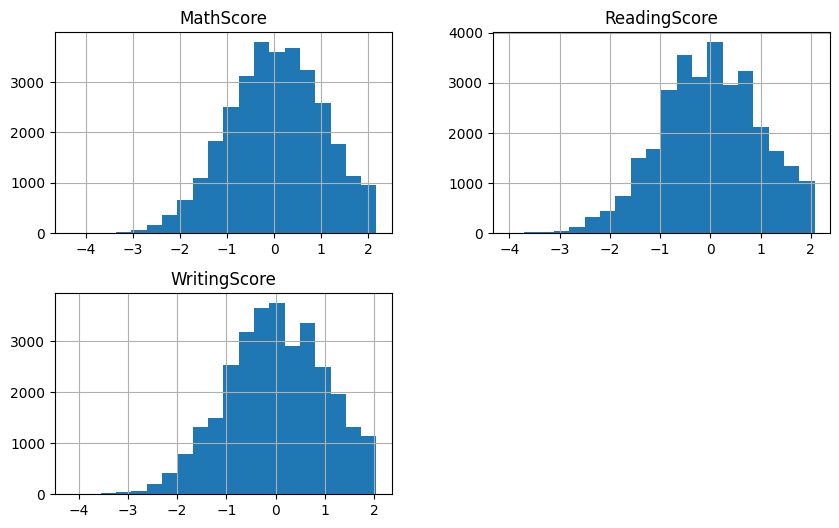

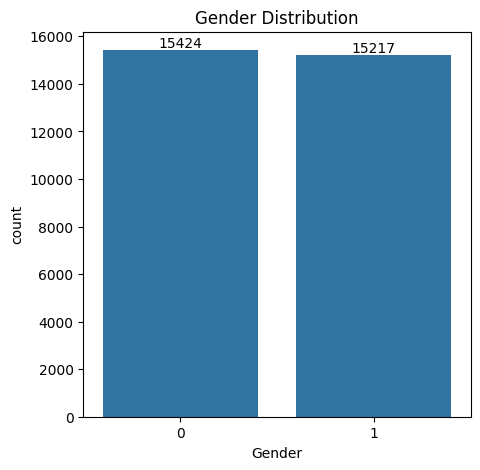

In [6]:
# Numerical features
# Histogram of scores
data[['MathScore', 'ReadingScore', 'WritingScore']].hist(bins=20, figsize=(10, 6))
plt.show()

# Categorical features
# Count plot of gender
plt.figure(figsize = (5,5))
ax = sns.countplot(data = data, x = "Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()


### Univariate Analysis

1. **Academic Scores (Math, Reading, Writing)**  
   - **Distribution**:  
     - MathScore, ReadingScore, and WritingScore follow a **roughly normal distribution**.  
     - Scores are concentrated around the mid-range (**50-80**), with fewer students scoring at the extremes (very low or very high).  
   - **Insights**:  
     - Most students perform moderately well in these subjects.  
     - There are no significant outliers or extreme skewness.  

2. **Gender Distribution**  
   - The count plot shows an **almost equal distribution** of male and female students.  
   - This indicates that **gender is balanced** in the dataset.   

---

### Key Observations
- Academic performance is **moderate** for most students, with scores clustering in the mid-range.  
- The dataset has a **balanced gender distribution**, making it suitable for unbiased gender analysis.  


## Bivariate Analysis:

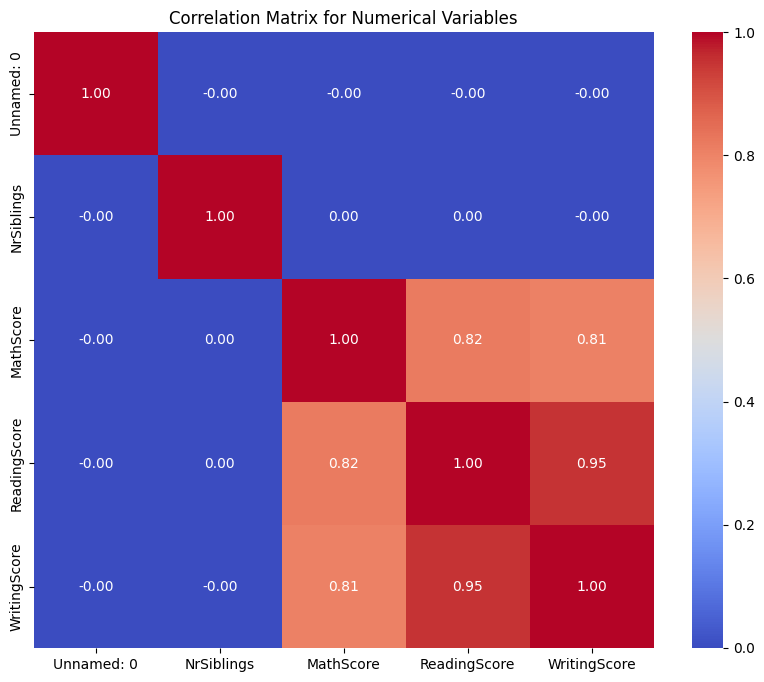

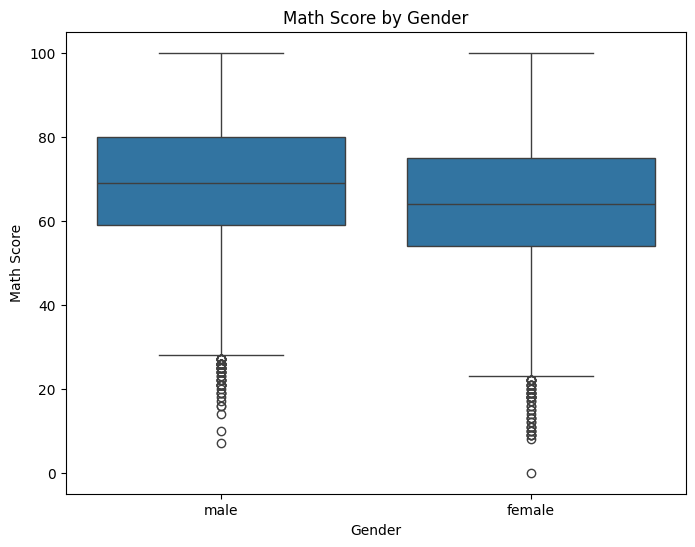

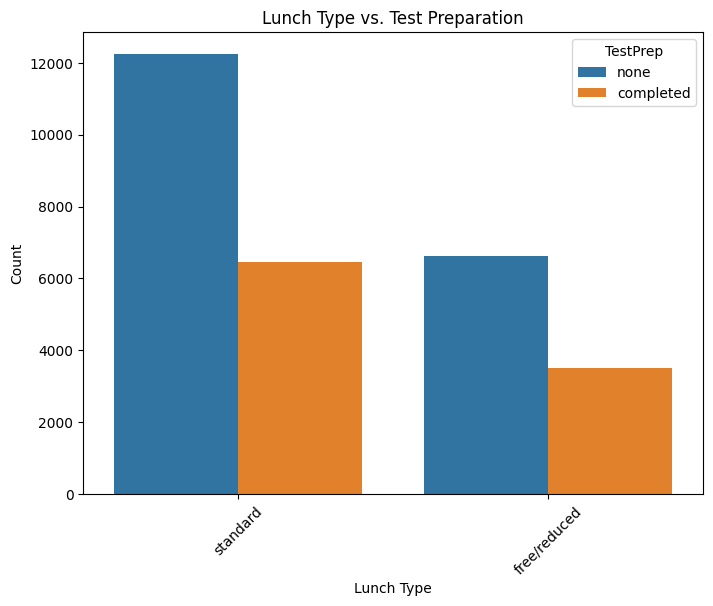

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9955.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18856.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro Test for Group1 (Completed TestPrep): p-value = 0.0000
Shapiro Test for Group2 (No TestPrep): p-value = 0.0000
Levene Test for Equal Variance: p-value = 0.5162
Mann-Whitney U Test: statistic = 109897089.00, p-value = 0.0000
T-Test skipped due to failed normality tests.


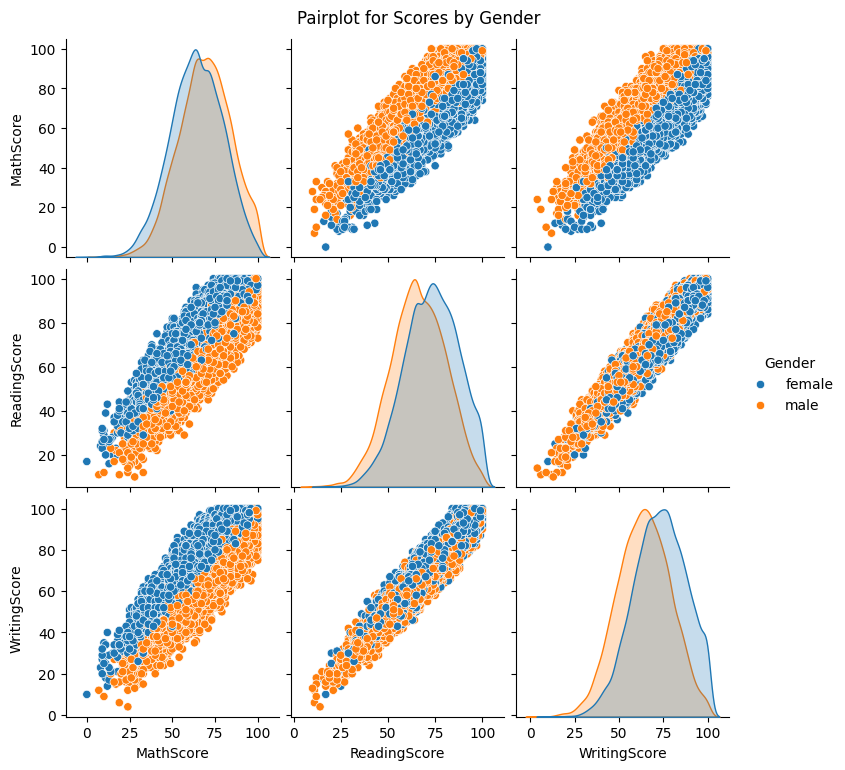

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu


# Handle missing values (optional, depending on your needs)
data = data.dropna(subset=['TestPrep', 'MathScore', 'Gender', 'LunchType'])

# 1. Correlation Matrix (for numerical variables only)
numeric_cols = data.select_dtypes(include='number').columns
corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

# 2. Categorical vs. Numerical (Boxplot: Gender vs. MathScore)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='MathScore', data=data, order=['male', 'female'])
plt.title('Math Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()

# 3. Categorical vs. Categorical (Countplot: LunchType vs. TestPrep)
plt.figure(figsize=(8, 6))
sns.countplot(x='LunchType', hue='TestPrep', data=data)
plt.title('Lunch Type vs. Test Preparation')
plt.xlabel('Lunch Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 4. Hypothesis Testing (MathScore by TestPrep groups)
group1 = data[data['TestPrep'] == 'completed']['MathScore']
group2 = data[data['TestPrep'] == 'none']['MathScore']

# Normality Tests
shapiro1 = shapiro(group1)
shapiro2 = shapiro(group2)
print(f"Shapiro Test for Group1 (Completed TestPrep): p-value = {shapiro1.pvalue:.4f}")
print(f"Shapiro Test for Group2 (No TestPrep): p-value = {shapiro2.pvalue:.4f}")

# Variance Test
levene_test = levene(group1, group2)
print(f"Levene Test for Equal Variance: p-value = {levene_test.pvalue:.4f}")

# Perform Mann-Whitney U Test since normality is violated
stat, p_value = mannwhitneyu(group1, group2)
print(f"Mann-Whitney U Test: statistic = {stat:.2f}, p-value = {p_value:.4f}")

# Optional: Perform t-test if assumptions were met
if shapiro1.pvalue > 0.05 and shapiro2.pvalue > 0.05:
    t_stat, p_value = ttest_ind(group1, group2, equal_var=(levene_test.pvalue > 0.05))
    print(f"T-Test: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
else:
    print("T-Test skipped due to failed normality tests.")

# 5. Pairplot for Numerical Scores with Proper Title Alignment
pairplot = sns.pairplot(data, vars=['MathScore', 'ReadingScore', 'WritingScore'], hue='Gender')
pairplot.fig.suptitle('Pairplot for Scores by Gender', y=1.02)  # Adjust title position
plt.show()


### Bivariate Analysis

1. **Correlation Analysis**  
   - **Strong correlations** between academic scores (MathScore, ReadingScore, WritingScore) suggest consistent performance across subjects.  

2. **Gender Analysis**  
   - Gender differences in MathScores are **minor**, as shown by similar boxplot distributions.  
   - Further statistical tests (e.g., t-tests) can be conducted to quantify any significant differences.  

3. **Lunch Type vs. Test Prep**  
   - A potential **socio-economic effect** may exist, as lunch type influences participation in test prep programs.  
   - Students with **free/reduced lunch** may require additional support to access test preparation resources.  

4. **Test Prep Effectiveness**  
   - Completing test preparation programs has a **statistically significant positive impact** on MathScores.  
   - This was demonstrated using the **Mann-Whitney U test** results.

---

### Key Insights
- Consistent performance across subjects highlights the need for **holistic academic support**.  
- Addressing **socio-economic disparities** (e.g., lunch type) could increase test prep participation and performance.  
- **Test preparation programs** significantly improve academic outcomes and should be expanded for better student success.


## Multivariate Analysis:

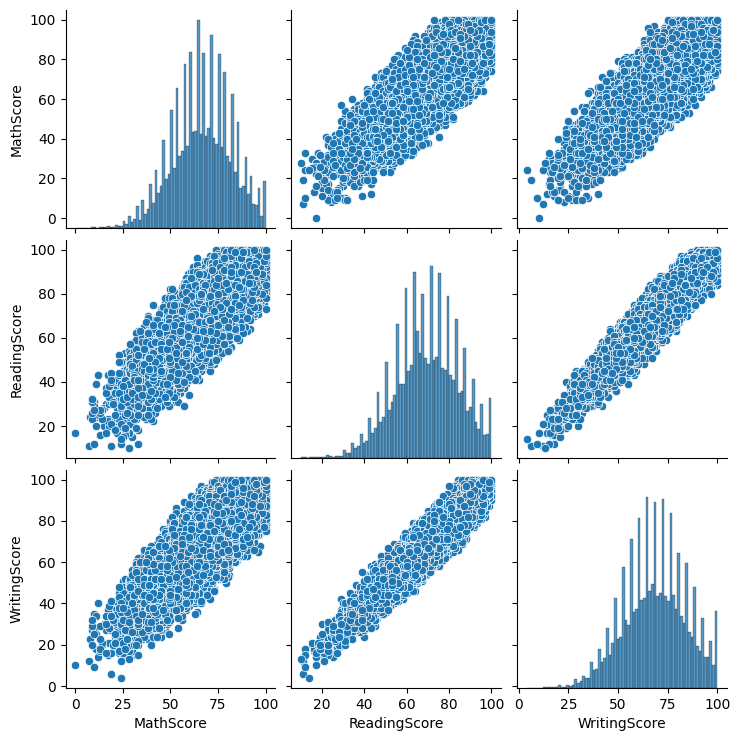

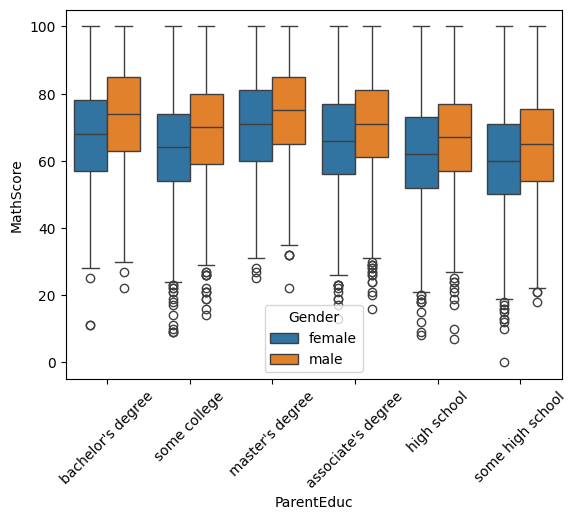

In [33]:
# Pairplot of numerical features
sns.pairplot(data[['MathScore', 'ReadingScore', 'WritingScore']])
plt.show()

# Grouped box plot of MathScore by ParentEduc and Gender
sns.boxplot(x='ParentEduc', y='MathScore', hue='Gender', data=data)
plt.xticks(rotation=45)
plt.show()

### Multivariate Analysis

1. **Box Plot: Parent Education & Gender**  
   - Students with **higher parental education** tend to score better in math.  
   - **Females** generally outperform males in math scores, though the difference is small.  

2. **Pair Plot: Math, Reading, and Writing Scores**  
   - **Strong correlations** exist among Math, Reading, and Writing scores.  
   - Students who perform well in one subject are likely to perform well in others.  
   - Most students achieve scores of **70+**, with slight variations across subjects.  

---

### Key Observations
- **Higher Parental Education**: Positively impacts math scores.  
- **Gender Performance**: Females slightly outperform males in math.  
- **Inter-Subject Consistency**: Strong performance in one subject predicts similar performance in others.  

These insights reinforce the importance of parental education and consistent academic support across all subjects.


# Data Modeling

In [9]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Segmentation with K-Means Clustering
# Using K-Means to group students based on demographic and performance attributes
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(data[['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']])

print("Clustering complete. Cluster assignment head:")
display(data[['Cluster']].head())

# Prediction of performance (binary classification)
# Create a target variable to classify students into high (>= 0.5) or low (< 0.5) overall performance
data['PerformanceLevel'] = (data['MathScore'] + data['ReadingScore'] + data['WritingScore']) / 3
data['PerformanceLevel'] = (data['PerformanceLevel'] >= 0).astype(int)  # 1 = high performance, 0 = low performance

# Split dataset into training and testing sets
X = data.drop(['Unnamed: 0', 'Cluster', 'PerformanceLevel'], axis=1)
y = data['PerformanceLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf_model.predict(X_test)
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance Analysis
feature_importances = rf_model.feature_importances_
feature_names = X.columns
importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
importances = importances.sort_values(by='importance', ascending=False)
print(importances)


Clustering complete. Cluster assignment head:


,Cluster
0,0
1,2
2,2
3,1
4,2


Random Forest Model Accuracy: 0.9945610790819102

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4548
           1       1.00      0.99      0.99      4645

    accuracy                           0.99      9193
   macro avg       0.99      0.99      0.99      9193
weighted avg       0.99      0.99      0.99      9193

                feature  importance
12         ReadingScore    0.352011
13         WritingScore    0.309744
11            MathScore    0.269137
3             LunchType    0.012587
0                Gender    0.012032
1           EthnicGroup    0.008213
4              TestPrep    0.007088
2            ParentEduc    0.006940
8            NrSiblings    0.006604
5   ParentMaritalStatus    0.003838
6         PracticeSport    0.003602
10       WklyStudyHours    0.003521
9        TransportMeans    0.002373
7          IsFirstChild    0.002310


## Data Modeling

1. **Clustering**  
   - Students were grouped into **3 clusters** based on their demographic and performance attributes:
     - **Features used**: `NrSiblings`, `MathScore`, `ReadingScore`, `WritingScore`.
     - Each student was assigned a **cluster label** based on their grouping.  
   - The **K-Means clustering** effectively identified distinct groups of students with similar performance levels.

2. **Target Variable Creation**  
   - A new target variable, **PerformanceLevel**, was created:
     - **1**: High-performing students.  
     - **0**: Low-performing students.  
   - The classification was based on the **average scores** of students.

3. **Classification Model**  
   - The **Random Forest Classifier** achieved:  
     - **Accuracy**: 99.46%  
     - **Precision, Recall, and F1-Scores**: Near-perfect.  
   - This demonstrates the model's high reliability in distinguishing between high- and low-performing students.

4. **Feature Importance**  
   - The most influential features in predicting student performance were:  
     - `ReadingScore`, `WritingScore`, and `MathScore` (academic metrics).  
   - **Demographic features** (e.g., `Gender`, `NrSiblings`) contributed minimally, reinforcing that individual academic performance drives success more than background factors.

---

#### Key Takeaway  
The combination of clustering and classification modeling successfully categorized students and identified key determinants of performance. The high accuracy of the model highlights its potential for real-world application in educational analysis.


# Evaluation

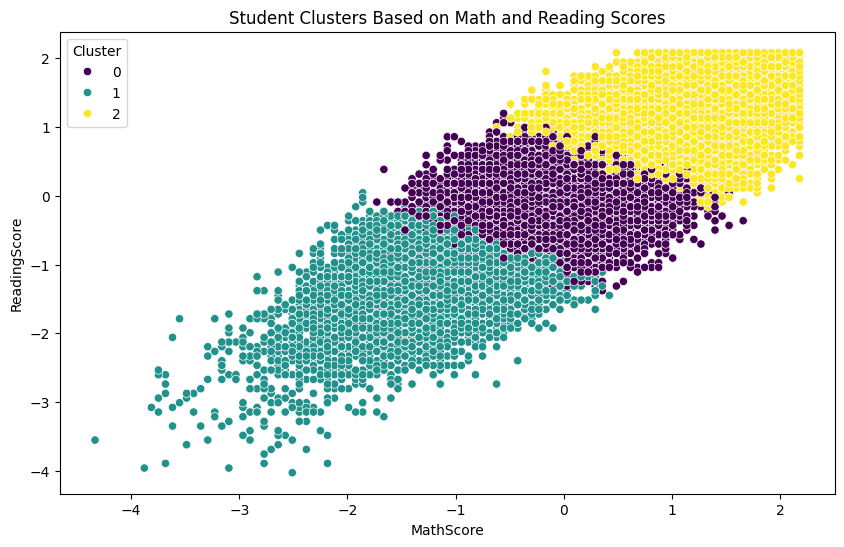

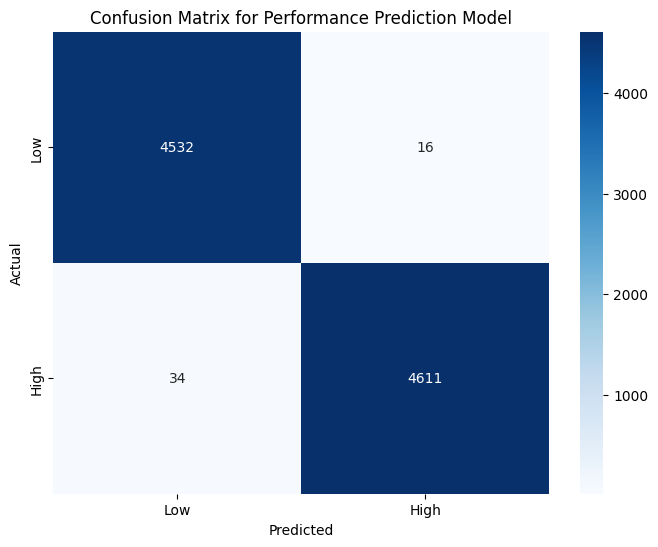

In [7]:
from sklearn.metrics import confusion_matrix


# Visualize the clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='MathScore', y='ReadingScore', hue='Cluster', palette='viridis')
plt.title("Student Clusters Based on Math and Reading Scores")
plt.show()

# Confusion matrix for the classification model
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Performance Prediction Model")
plt.show()


## Evaluation

1. **Clustering Visualization**  
   - The scatterplot effectively shows clusters of students based on their **MathScore** and **ReadingScore**.  
   - Distinct clusters (0, 1, 2) are well-separated, indicating that the **K-Means clustering** successfully grouped students with similar performance levels.  
   - This confirms the clustering algorithm's effectiveness in identifying performance patterns.

2. **Model Performance Metrics**  
   The model's prediction outcomes are as follows:  
   - **True Positives (TP)**: 4532 data points correctly predicted as "Low" performance.  
   - **True Negatives (TN)**: 4611 data points correctly predicted as "High" performance.  
   - **False Positives (FP)**: 16 data points incorrectly predicted as "High" when they were actually "Low."  
   - **False Negatives (FN)**: 34 data points incorrectly predicted as "Low" when they were actually "High."  

3. **Overall Accuracy**  
   - The model demonstrates **high overall accuracy**, as most predictions are correct.
   - The number of "Low" performance data points is much higher than "High" performance data points. This could potentially skew the results and make the model appear more accurate than it actually is.

# Conclusion

Our analysis revealed that **academic scores** are the primary predictor of student success, with **parental education** and **test preparation** playing significant roles. **Gender differences** in performance were minimal.

## Recommendations

Based on our findings, we recommend the following actions for schools:

1. **Expand Test Preparation Programs**  
   Focus on making test preparation resources more accessible, especially for disadvantaged students.  

2. **Target Support for Low-Performing Students**  
   Provide personalized interventions and mentoring for students identified as low performers.  

3. **Encourage Parental Involvement**  
   Engage parents, particularly those with lower educational backgrounds, by offering resources to support their children’s learning.  

4. **Promote Cross-Subject Consistency**  
   Develop interdisciplinary teaching methods to strengthen performance across all subjects, as strong correlations exist between them.  

5. **Monitor Student Performance Trends**  
   Use performance clustering techniques to regularly track trends and intervene early for struggling students.  

By implementing these recommendations, schools can improve overall student success and foster a more inclusive learning environment.
